ADR Stands for Adverse Drug Reaction
*** Basically this dataset shows adverse reactions that happened after taking the vaccine, but it doesn't have to have anything to do wtha ctually taking the vaccine. many of suspect drugs that are most likely the cause.
Reaction Events
 - If the Serious box is filled than that means there was a serious reaction, if empty than there was none
 - In the suspect/interacting drug we see a list of drugs. 
   *  The S stands for suspect which means the doctors suspect that the drug caused the reaction. The C for concomitant means drugs that were taken at the same time for other reasons and may have caused harm when combined. The I stands for interacting and means that the drug interacted with another one of the drugs which could be bad. N means not administered which means no drugs were administered
   *  The indication on the Suspect/interacting column stands for the reason why they're taking these drugs
- In the ICSR Form, the rechallenge matrix table shows if the drug was reintroduced and if the side effects came back. Rechallenge means if the drug came back and reaction recurred means if the reaction came back

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COVID_Vaccine_Moderna.csv')
df = df.dropna()
df['EV Gateway Receipt Date'] = df['EV Gateway Receipt Date'].apply(lambda x: x.split(' ')[0])
df = df.drop(['EU Local Number', 'Report Type', 'Literature Reference', 'Patient Age Group (as per reporter)'], axis = 1)
df.head(3)

,EV Gateway Receipt Date,Primary Source Qualification,Primary Source Country for Regulatory Purposes,Patient Age Group,Parent Child Report,Patient Sex,Reaction List PT (Duration – Outcome - Seriousness Criteria),Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),Concomitant/Not Administered Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),ICSR Form
0,2022-08-05,Healthcare Professional,Non European Economic Area,18-64 Years,No,Female,"Fatigue (n/a - Not Recovered/Not Resolved - ),<BR><BR>Hypertension (n/a - Unknown - ),<BR><BR>Immune-mediated hypothyroidism (n/a - Unknown - Other Medically Important Condition)","KEYTRUDA [PEMBROLIZUMAB] (S - Uterine cancer - Dose not changed - [n/a - 200mg - n/a]),<BR><BR>[LENVATINIB MESILATE] (S - Uterine cancer - Dose not changed - [n/a - 20mg - Oral use])",Not reported,"<a target=""_blank"" href=""https://dap.ema.europa.eu/xmlpserver/PHV%20DAP/Reports/ICSR.xdo?_xpf=&_xt=form&SR_ID=10013173011&_xpt=1&_xf=pdf"">ICSR</a>"
1,2022-08-05,Non Healthcare Professional,European Economic Area,3-11 Years,No,Male,"Syncope (1d - Recovered/Resolved - Other Medically Important Condition),<BR><BR>Vaccination site pain (n/a - Unknown - )","GARDASIL 9 [HUMAN PAPILLOMAVIRUS TYPE 31 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 33 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 45 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 52 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 58 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 11 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 16 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 18 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, HUMAN PAPILLOMAVIRUS TYPE 6 L1 PROTEIN - ADSORBED - IN THE FORM OF VIRUS-LIKE PARTICLES PRODUCED IN YEAST CELLS (SACCHAROMYCES CEREVISIAE CANADE 3C-5 (STRAIN 1895)) BY RDNA, AMORPHOUS ALUMINIUM HYDROXYPHOSPHATE SULPHATE] (S - Prophylaxis - Not applicable - [n/a - n/a - n/a])",Not reported,"<a target=""_blank"" href=""https://dap.ema.europa.eu/xmlpserver/PHV%20DAP/Reports/ICSR.xdo?_xpf=&_xt=form&SR_ID=10013173016&_xpt=1&_xf=pdf"">ICSR</a>"
2,2022-08-05,Healthcare Professional,Non European Economic Area,65-85 Years,No,Female,"Diabetes mellitus inadequate control (n/a - Not Recovered/Not Resolved - Other Medically Important Condition),<BR><BR>Diarrhoea (n/a - Not Recovered/Not Resolved - ),<BR><BR>Inability to afford medication (n/a - Unknown - ),<BR><BR>Intentional product misuse (n/a - Unknown - ),<BR><BR>Wrong technique in product usage process (n/a - Unknown - )","JANUVIA [SITAGLIPTIN, SITAGLIPTIN PHOSPHATE, SITAGLIPTIN PHOSPHATE MONOHYDRATE] (S - Type 2 diabetes mellitus - Unknown - [n/a - 100mg - Oral use]),<BR><BR>[METFORMIN, METFORMIN HYDROCHLORIDE, METFORMIN HYDROCHLORIDE BP] (S - n/a - Unknown - [n/a - n/a - n/a])",[GLIMEPIRIDE] (C - n/a - n/a - [n/a - n/a - n/a]),"<a target=""_blank"" href=""https://dap.ema.europa.eu/xmlpserver/PHV%20DAP/Reports/ICSR.xdo?_xpf=&_xt=form&SR_ID=10013173019&_xpt=1&_xf=pdf

In [3]:
df.groupby('Patient Age Group').count()['EV Gateway Receipt Date']

Patient Age Group
0-1 Month                156
12-17 Years             4726
18-64 Years           167419
2 Months - 2 Years      1408
3-11 Years              1768
65-85 Years            45538
More than 85 Years      4865
Not Specified          24020
Name: EV Gateway Receipt Date, dtype: int64

In [4]:
pd.DataFrame(df.iloc[2])

,2
EV Gateway Receipt Date,2022-08-05
Primary Source Qualification,Healthcare Professional
Primary Source Country for Regulatory Purposes,Non European Economic Area
Patient Age Group,65-85 Years
Parent Child Report,No
Patient Sex,Female
Reaction List PT (Duration – Outcome - Seriousness Criteria),"Diabetes mellitus inadequate control (n/a - Not Recovered/Not Resolved - Other Medically Important Condition),<BR><BR>Diarrhoea (n/a - Not Recovered/Not Resolved - ),<BR><BR>Inability to afford medication (n/a - Unknown - ),<BR><BR>Intentional product misuse (n/a - Unknown - ),<BR><BR>Wrong technique in product usage process (n/a - Unknown - )"
Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),"JANUVIA [SITAGLIPTIN, SITAGLIPTIN PHOSPHATE, SITAGLIPTIN PHOSPHATE MONOHYDRATE] (S - Type 2 diabetes mellitus - Unknown - [n/a - 100mg - Oral use]),<BR><BR>[METFORMIN, METFORMIN HYDROCHLORIDE, METFORMIN HYDROCHLORIDE BP] (S - n/a - Unknown - [n/a - n/a - n/a])"
Concomitant/Not Administered Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),[GLIMEPIRIDE] (C - n/a - n/a - [n/a - n/a - n/a])
ICSR Form,"<a target=""_blank"" href=""https://dap.ema.europa.eu/xmlpserver/PHV%20DAP/Reports/ICSR.xdo?_xpf=&_xt=form&SR_ID=10013173019&_xpt=1&_xf=pdf"">ICSR</a>"


Is our sample data representative of the population data?

In [5]:
'''
from datascience import *
def tvd(obs, pred):
    return sum(abs(obs - pred))/2
arr = np.array([])
preds = np.array([0.17,0.002,0.026,0.011,0.017,0.507,0.235,0.032])
for i in np.arange(10000):
    sample_props = np.unique(np.random.choice(8, len(df), p = preds), return_counts=True)[1]/len(df)
    tvd_one = tvd(sample_props, preds)
    arr = np.append(arr, tvd_one)

our_test = tvd(np.array([0.096118, 0.000624, 0.005634, 0.007075, 0.018912, 0.669944, 0.182225, 0.019468]),preds)
print('Range is from:', percentile(2.5, arr),'to',percentile(97.5, arr))
print('Our tvd is:',our_test)
'''

"\nfrom datascience import *\ndef tvd(obs, pred):\n    return sum(abs(obs - pred))/2\narr = np.array([])\npreds = np.array([0.17,0.002,0.026,0.011,0.017,0.507,0.235,0.032])\nfor i in np.arange(10000):\n    sample_props = np.unique(np.random.choice(8, len(df), p = preds), return_counts=True)[1]/len(df)\n    tvd_one = tvd(sample_props, preds)\n    arr = np.append(arr, tvd_one)\n\nour_test = tvd(np.array([0.096118, 0.000624, 0.005634, 0.007075, 0.018912, 0.669944, 0.182225, 0.019468]),preds)\nprint('Range is from:', percentile(2.5, arr),'to',percentile(97.5, arr))\nprint('Our tvd is:',our_test)\n"

Sadly it seems that our data is way off from being a representative sample of what was in the original data, nevertheless I will still do analysis on this data, assuming it represents the population well enough.

Some things that can be good to look at in the Reaction List PT:
- misuse
- afford
- 

Let's start by looking at the typical Reaction/Event that happens after taking the COVID Moderna Vaccine.

In [33]:
un_len = {}
def reactionary(arr):
    for word in arr:
        g = word.replace(' (', '*').replace('>', '*')
        g = g.split('*')[0:len(g):3]
        for i in g:
            un_len[f'{i}'] = un_len.get(f'{i}', 0) + 1

reactionary(df['Reaction List PT (Duration – Outcome - Seriousness Criteria)'])

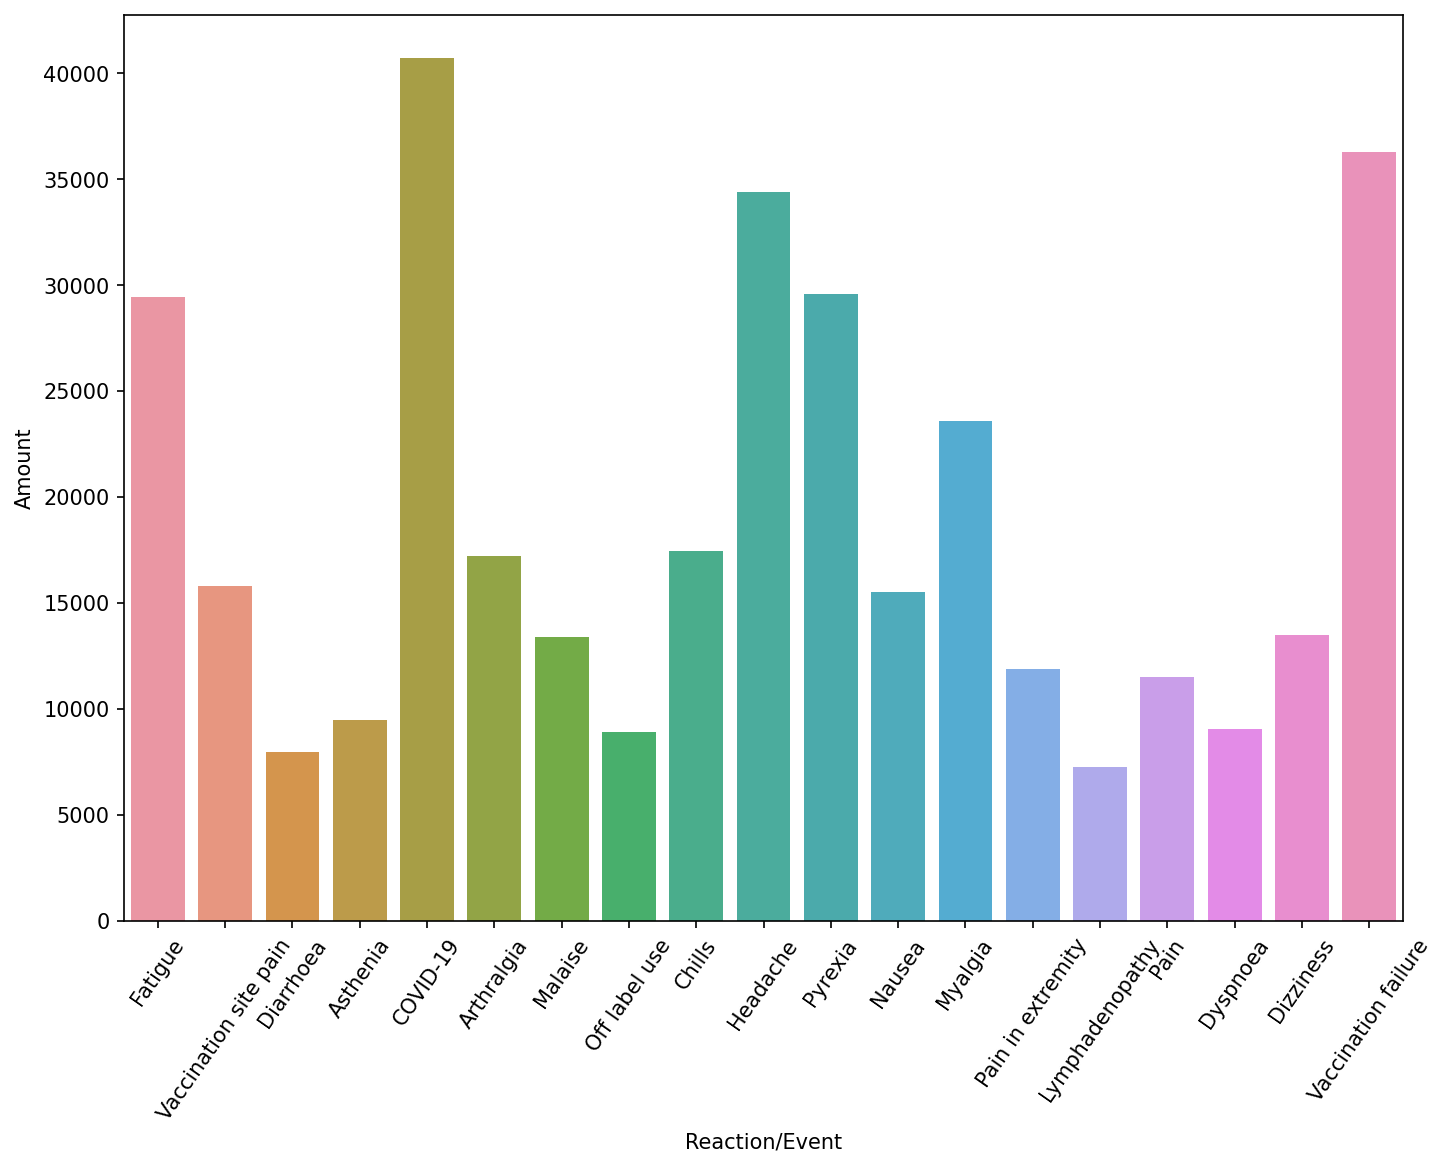

In [54]:
uniques = pd.DataFrame(un_len.items(), columns=['Reaction/Event', 'Amount'])
plt.figure(figsize=(11, 8), dpi = 150);
sns.barplot(data=uniques[uniques['Amount'] > uniques['Amount'].quantile(0.998)], x = 'Reaction/Event', y = 'Amount')
plt.xticks(rotation = 55);

Okay so most of the most common reactions seem fairly mild which is good because it suggests that not much harm was done to the person. 

One thing that I do find interesting is how many people developed COVID-19 as a reaction. Thinking about it, this actually proves how unreliable analysis on this data is. The Covid vaccine cannot cause COVID since it doesn't insert a live version of the Covid virus into you, so people getting COVID-19 is just because they ended up getting COVID some period of time after getting the shot. It's useful to keep this in mind when we look at other side effects as many of them may have just come about rather than be directly caused by the vaccine.

Which drug is suspected most to have cuased the side effects in the person?